# Lab | Intro to Probability

**Objective**

Welcome to this Intro to Probability lab, where we explore decision-making scenarios through the lens of probability and strategic analysis. In the business world, making informed decisions is crucial, especially when faced with uncertainties. This lab focuses on scenarios where probabilistic outcomes play a significant role in shaping strategies and outcomes. Students will engage in exercises that require assessing and choosing optimal paths based on data-driven insights. The goal is to enhance your skills by applying probability concepts to solve real-world problems.

**Challenge 1**

#### Ironhack Airlines 

Often Airlines sell more tickets than they have seats available, this is called overbooking. Consider the following:
- A plane has 450 seats. 
- Based on historical data we conclude that each individual passenger has a 3% chance of missing it's flight. 

If the Ironhack Airlines routinely sells 460 tickets, what is the chance that they have a seats for all passenger?

### **Back to the Ironhack Airlines Example**  
- **Discrete random variable**: Number of passengers showing up (\( X \)).  
  - Why? You can’t have 450.5 passengers—it’s either 450, 451, ..., 460.  
- **PMF** would tell you:  
  - \( P(X=450) \): Probability exactly 450 passengers show up.  
- **CDF** would tell you:  
  - \( P(X <= 450) \): Probability that **at most** 450 passengers show up (which is what we calculated!).  


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, geom, stats

In [2]:
#code here
plane = 450  # < - k value
ticket_sold = 460 # <- N
chance_missing = 0.03
chance_sucsess = 0.97 # <- P

# Possible number of successful getting in the plane (0 to plane capacitiy)
# k_values = np.arange(0, plane + 1)

# Binomial probabilities
probability = binom.cdf(plane, ticket_sold, chance_sucsess)

print(f"Probability all passengers get a seat: {probability:.4f} (or {probability*100:.2f}%)")


Probability all passengers get a seat: 0.8845 (or 88.45%)


**Challenge 2**

#### Ironhack Call Center 

Suppose a customer service representative at a call center is handling customer complaints. Consider the following:
- The probability of successfully resolving a customer complaint on the first attempt is 0.3. 


What is the probability that the representative needs to make at least three attempts before successfully resolving a customer complaint?

In [3]:
# Import the library
from scipy.stats import geom

# Define variables
p = 0.3  # 30% success chance per attempt
k = 3    # At least 3 attempts

# Method 1: Direct formula (0.7^2)
probability_manual = (1 - p) ** (k - 1)

# Method 2: Geometric survival function (P(X > 2))
probability_geom = geom.sf(2, p)

# Print results
print(f"Probability (Manual): {probability_manual:.4f} → 49%")
print(f"Probability (scipy.geom): {probability_geom:.4f} → 49%")

Probability (Manual): 0.4900 → 49%
Probability (scipy.geom): 0.4900 → 49%


In [4]:
'''
#This is wrong: 
p_success = 0.3 # <- p: Probability of success on a single attempt
#code here
p_success = 0.3 # <- p: Probability of success on a single attempt
k_target = 3    # <- k: The minimum number of attempts (here, k = 3)

prob_third_try1 = geom.pmf(k_target, p_success)
prob_third_try2 = geom.cdf(k_target, p_success)
print(prob_third_try1)
print(prob_third_try2)


'''

'\n#This is wrong: \np_success = 0.3 # <- p: Probability of success on a single attempt\n#code here\np_success = 0.3 # <- p: Probability of success on a single attempt\nk_target = 3    # <- k: The minimum number of attempts (here, k = 3)\n\nprob_third_try1 = geom.pmf(k_target, p_success)\nprob_third_try2 = geom.cdf(k_target, p_success)\nprint(prob_third_try1)\nprint(prob_third_try2)\n\n\n'

**Challenge 3**

#### Ironhack Website

Consider a scenario related to Ironhack website traffic. Where:
- our website takes on average 500 visits per hour.
- the website's server is designed to handle up to 550 vists per hour.


What is the probability of the website server being overwhelmed?

In [5]:
#code here
from scipy.stats import poisson

mu = lambda_rate = mean_visits = 500  # Average visits per hour
k = max_vistits = 550               # Max Server capacity visits per hour


prob_crash = 1 - poisson.cdf(k, mu)
print(f"Probability of server being overwhelmed: {prob_crash:.4f} ({prob_crash*100:.2f}%)")


Probability of server being overwhelmed: 0.0129 (1.29%)


NameError: name 'k_target' is not defined

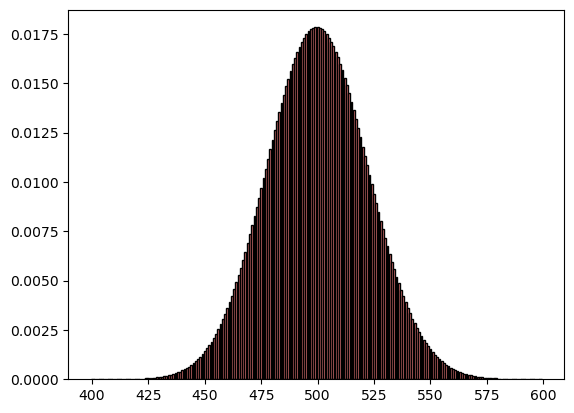

In [6]:
# Values for plotting
k_values = np.arange(400, 600)

# PMF and CDF values
pmf_values = poisson.pmf(k_values, mu)
cdf_values = poisson.cdf(k_values, mu)

# Plot PMF
plt.bar(k_values, pmf_values, color='lightcoral', edgecolor='black', label='PMF')
plt.axvline(k, color='red', linestyle='dashed', label=f'Target: {k_target} visits')
plt.title('Probability Mass Function (PMF): the website server being overwhelmed')
plt.xlabel('Number of vists per hour')
plt.ylabel('Probability')
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Plot CDF
plt.bar(k_values, cdf_values, color='skyblue', label='CDF')
plt.axvline(k, color='red', linestyle='dashed', label=f'Target: {k_target} visits')
plt.title('CDF: Cumulative Probability of Website Visits')
plt.xlabel('Number of Visits per Hour')
plt.ylabel('Cumulative Probability')
plt.xticks(k_values)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

What is the probability of being overwhelmed at some point during a day? (consider 24hours)

In [ ]:
#code here
# - our website takes on average 500 visits per hour.
# - the website's server is designed to handle up to 550 vists per hour.

mu_day = mu * 24
k_day = k * 24

# Calculate the probability of not being overwhelmed in one hour:
prob_not_crash = poisson.cdf(k, mu)
print(f"probability of not being overwhelmed in one hour: {prob_not_crash:.4f} ({prob_not_crash*100:.2f}%)")

# Calculate the probability of never being overwhelmed in 24 hours (assuming independence):
prob_not_crash_day = prob_not_crash ** 24
print(f"probability of not being overwhelmed in 24 hours: {prob_not_crash_day:.4f} ({prob_not_crash_day*100:.2f}%)")

# Find the probability of being overwhelmed at least once in 24 hours:
prob_crash_day = 1 - prob_not_crash_day
print(f"probability of being overwhelmed in 24 hours: {prob_crash_day:.4f} ({prob_crash_day*100:.2f}%)")

# or straigth like this:
prob_crash24 = 1 - (poisson.cdf(k, mu))**24
prob_crash24

probability of not being overwhelmed in one hour: 0.9871 (98.71%)
probability of not being overwhelmed in 24 hours: 0.7323 (73.23%)
probability of being overwhelmed in 24 hours: 0.2677 (26.77%)


0.2677043869515715

**Challenge 4**

#### Ironhack Helpdesk

Consider a scenario related to the time between arrivals of customers at a service desk.

On average, a customers arrives every 10minutes.

A - What is the probability that the next customer will arrive within the next 5 minutes?

In [ ]:
from scipy.stats import expon

# Problem 1: P(T ≤ 5)

scale = 10  # Average time between arrivals = 10 minutes
t1 = 5       # We want P(T ≤ 5 minutes)
prob_within_5 = expon.cdf(t1, scale=scale)
print(f"Probability next customer arrives within 5 minutes: {prob_within_5:.4f} ({prob_within_5*100:.1f}%)")


Probability next customer arrives within 5 minutes: 0.3935 (39.3%)


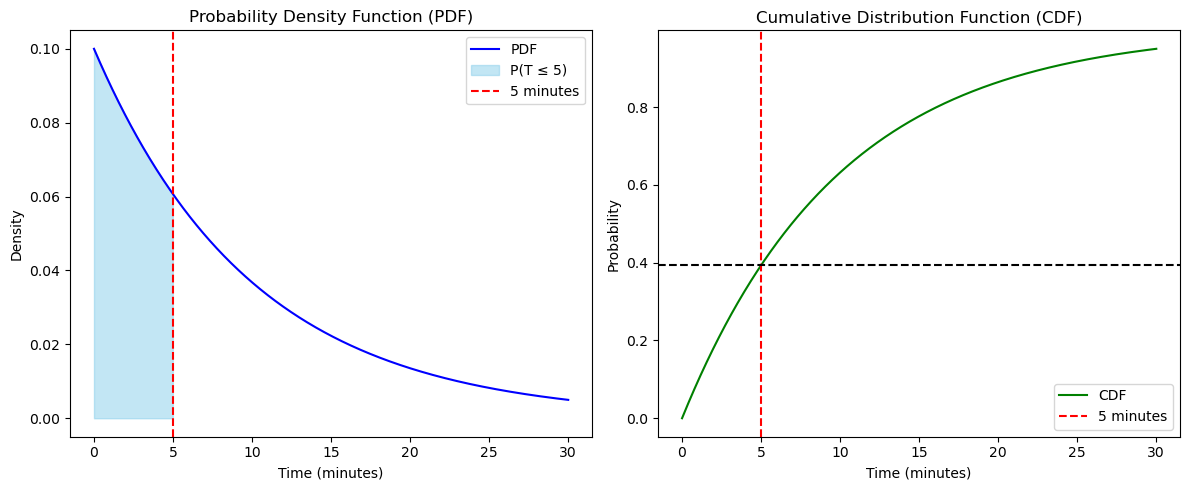

In [ ]:
# Time values for plotting
time = np.linspace(0, 30, 1000)
pdf = expon.pdf(time, scale=scale)
cdf = expon.cdf(time, scale=scale)

# Plot PDF and CDF
plt.figure(figsize=(12, 5))

# PDF Plot
plt.subplot(1, 2, 1)
plt.plot(time, pdf, 'b-', label='PDF')
plt.fill_between(time[time <= t1], pdf[time <= t1], color='skyblue', alpha=0.5, label='P(T ≤ 5)')
plt.axvline(t1, color='red', linestyle='--', label='5 minutes')
plt.title('Probability Density Function (PDF)')
plt.xlabel('Time (minutes)')
plt.ylabel('Density')
plt.legend()

# CDF Plot
plt.subplot(1, 2, 2)
plt.plot(time, cdf, 'g-', label='CDF')
plt.axvline(t1, color='red', linestyle='--', label='5 minutes')
plt.axhline(prob_within_5, color='black', linestyle='--')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Time (minutes)')
plt.ylabel('Probability')
plt.legend()

plt.tight_layout()
plt.show()

B - If there is no customer for 15minutes, employees can that a 5minutes break.

What is the probability an employee taking a break?

In [ ]:
# Problem 2: P(T > 15)
t2 = 15
prob_break = 1 - expon.cdf(t2, scale=scale)
print(f"Probability employees take a break (no customer for 15 minutes): {prob_break:.4f} ({prob_break*100:.1f}%)")

Probability employees take a break (no customer for 15 minutes): 0.2231 (22.3%)


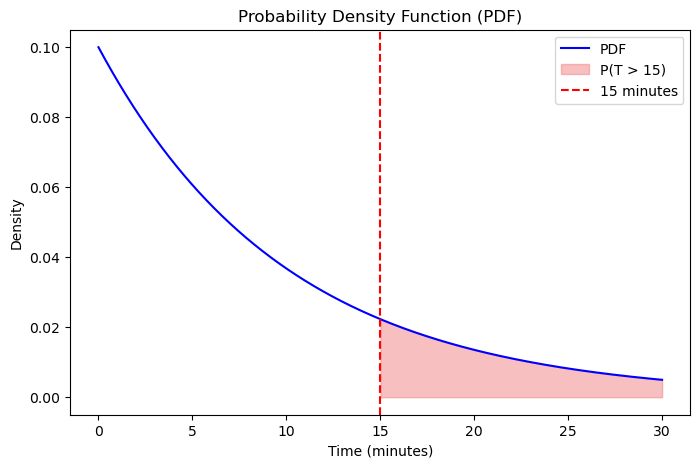

In [ ]:
# Survival function (P(T > 15))
plt.figure(figsize=(8, 5))
plt.plot(time, pdf, 'b-', label='PDF')
plt.fill_between(time[time >= t2], pdf[time >= t2], color='lightcoral', alpha=0.5, label='P(T > 15)')
plt.axvline(t2, color='red', linestyle='--', label='15 minutes')
plt.title('Probability Density Function (PDF)')
plt.xlabel('Time (minutes)')
plt.ylabel('Density')
plt.legend()
plt.show()

**Challenge 5**

The weights of a certain species of birds follow a normal distribution with a mean weight of 150 grams and a standard deviation of 10 grams. 

- If we randomly select a bird, what is the probability that its weight is between 140 and 160 grams?

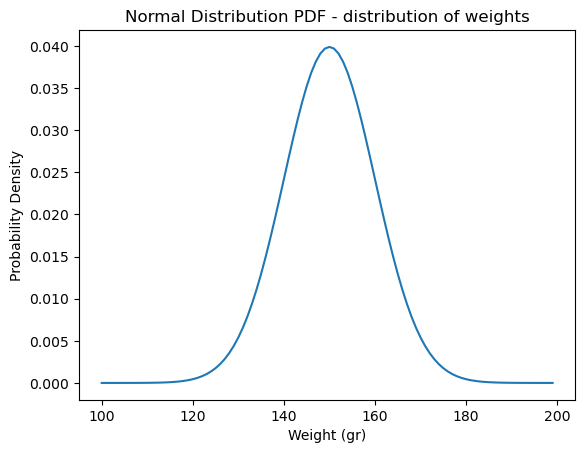

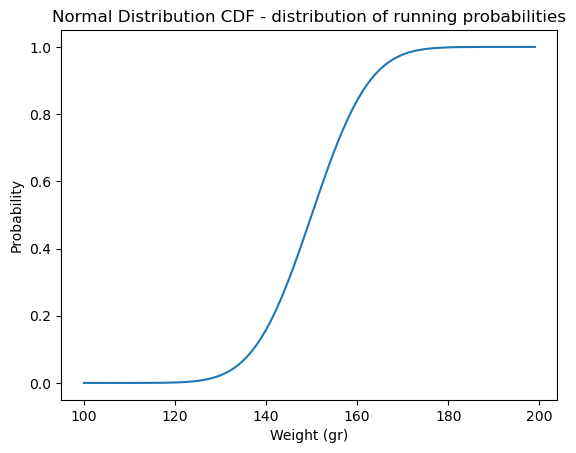

In [ ]:
#code here
import scipy.stats as stats

# Given parameters
mean = mu = 150  # Mean weights in gr
sd = sigma = 10  # Standard deviation in gr
X1 = 160  # less than in gr.
x2 = 140   # more than in gr.

x_values = np.arange(100,200)


probabilities = stats.norm.pdf(x_values, mean, sd)
plt.plot(x_values, probabilities)
plt.title('Normal Distribution PDF - distribution of weights')
plt.xlabel('Weight (gr)')
plt.ylabel('Probability Density')
plt.show()


probabilities = stats.norm.cdf(x_values, mean, sd) 
plt.plot(x_values, probabilities)
plt.title('Normal Distribution CDF - distribution of running probabilities')
plt.xlabel('Weight (gr)')
plt.ylabel('Probability')
plt.show()


In [ ]:
p_less_160 = stats.norm.cdf(160, mean, sd)
print(f"probability of being less than 160 grams: {p_less_160}")
p_less_140 = stats.norm.cdf(140, mean, sd)
print(f"probability of being less than 140 grams: {p_less_160}")


probability_final = p_less_160 - p_less_140

print(f"the probability that its weight is between 140 and 160 grams: {probability_final}")


probability of being less than 160 grams: 0.8413447460685429
probability of being less than 140 grams: 0.8413447460685429
the probability that its weight is between 140 and 160 grams: 0.6826894921370859


**Challenge 6**

If the lifetime (in hours) of a certain electronic component follows an exponential distribution with a mean lifetime of 50 hours, what is the probability that the component fails within the first 30 hours?

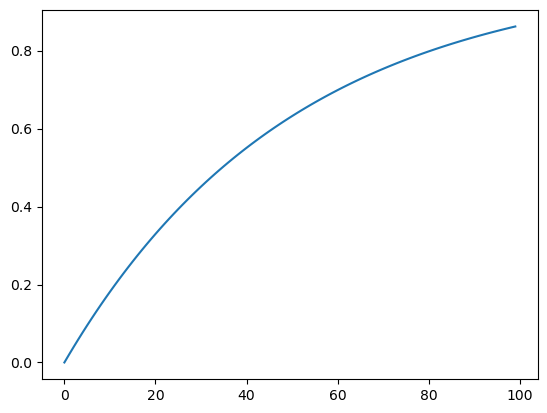

In [10]:
#code here
import scipy.stats as stats

mean = 50

x_values = np.arange(0, 100)

cumu_probabilities = stats.expon.cdf(x_values, scale=mean)
plt.plot(x_values, cumu_probabilities)


In [11]:
proba_less_30 = stats.expon.cdf(30, scale=mean)
proba_less_30

0.4511883639059736

Exponential Distribution Analysis
--------------------------------
Mean lifetime: 50 hours
Probability of failure within 30 hours: 0.4512 (45.1%)



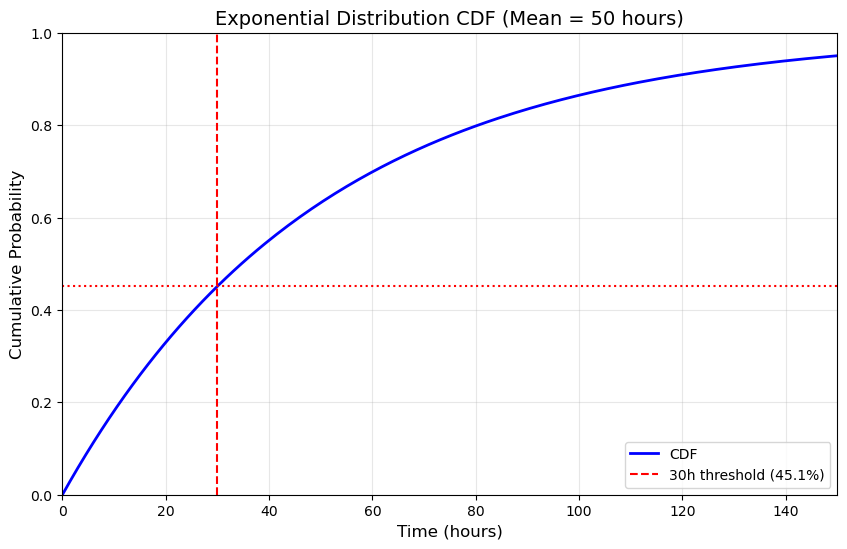

In [12]:
# Failure Probability Calculation for Exponential Distribution
# ----------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters
mean_lifetime = 50  # Mean lifetime (hours)
failure_threshold = 30  # Time threshold we're interested in (hours)

# Exponential distribution setup
# For scipy.stats.expon, scale = mean = 1/λ
dist = stats.expon(scale=mean_lifetime)

# Calculate cumulative probability at 30 hours
prob_failure_within_30h = dist.cdf(failure_threshold)

# Print results in human-readable format
print("Exponential Distribution Analysis")
print("--------------------------------")
print(f"Mean lifetime: {mean_lifetime} hours")
print(f"Probability of failure within {failure_threshold} hours: {prob_failure_within_30h:.4f} ({prob_failure_within_30h*100:.1f}%)\n")

# Visualization of CDF
x_values = np.linspace(0, 3*mean_lifetime, 200)  # Range: 0-150 hours (3x mean)
cdf_values = dist.cdf(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, cdf_values, 'b-', linewidth=2, label='CDF')

# Highlight our specific threshold
plt.axvline(failure_threshold, color='r', linestyle='--', 
           label=f'30h threshold ({prob_failure_within_30h*100:.1f}%)')
plt.axhline(prob_failure_within_30h, color='r', linestyle=':')

plt.title(f"Exponential Distribution CDF (Mean = {mean_lifetime} hours)", fontsize=14)
plt.xlabel("Time (hours)", fontsize=12)
plt.ylabel("Cumulative Probability", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis([0, 150, 0, 1])  # Set axis limits
plt.show()